In [ ]:
import csv
import random
from datetime import datetime, timedelta

# Настройки генерации
RECORDS_COUNT = 100  # Количество записей
USERS_COUNT = 10     # Количество уникальных пользователей
START_DATE = datetime(2024, 1, 1)
END_DATE = datetime(2024, 12, 31)

data = []
for _ in range(RECORDS_COUNT):
    user_id = random.randint(1, USERS_COUNT)
    date = START_DATE + timedelta(days=random.randint(0, (END_DATE - START_DATE).days))
    session_duration = random.randint(1, 120) 
    actions = random.randint(1, 50)        
    
    data.append([
        user_id,
        date.strftime("%Y-%m-%d"),
        session_duration,
        actions
    ])


with open('user_activity.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['user_id', 'date', 'session_duration', 'actions'])  
    writer.writerows(data)

print("Файл user_activity.csv успешно создан")

Файл user_activity.csv успешно создан


In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('user_activity.csv')
df.head()

,user_id,date,session_duration,actions
0,7,2024-06-10,63,45
1,5,2024-01-18,80,31
2,7,2024-10-28,98,27
3,5,2024-12-05,65,48
4,10,2024-08-26,108,12


In [12]:
df['date']

0     2024-06-10
1     2024-01-18
2     2024-10-28
3     2024-12-05
4     2024-08-26
         ...    
95    2024-07-25
96    2024-11-11
97    2024-02-13
98    2024-06-20
99    2024-04-13
Name: date, Length: 100, dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['date']

0    2024-06-10
1    2024-01-18
2    2024-10-28
3    2024-12-05
4    2024-08-26
        ...    
95   2024-07-25
96   2024-11-11
97   2024-02-13
98   2024-06-20
99   2024-04-13
Name: date, Length: 100, dtype: datetime64[ns]

In [15]:
last_months = df['date'].iloc[-1] - pd.DateOffset(months=1)
df = df[df['date'] >= last_months]

In [16]:
df

,user_id,date,session_duration,actions
0,7,2024-06-10,63,45
2,7,2024-10-28,98,27
3,5,2024-12-05,65,48
4,10,2024-08-26,108,12
5,7,2024-05-15,61,44
...,...,...,...,...
94,4,2024-04-12,58,15
95,6,2024-07-25,49,13
96,4,2024-11-11,108,20
98,3,2024-06-20,50,25


In [20]:
daily_status = df.groupby('date').agg(
    avg_duration=('session_duration', 'mean'),
    unique_users=('user_id', 'nunique')
).reset_index()
daily_status

,date,avg_duration,unique_users
0,2024-03-13,4.0,1
1,2024-03-14,87.0,1
2,2024-03-15,106.0,1
3,2024-03-18,109.0,1
4,2024-03-21,33.0,1
...,...,...,...
65,2024-12-07,19.0,1
66,2024-12-10,92.0,1
67,2024-12-12,67.0,1
68,2024-12-28,50.0,1


In [22]:
peak_day = daily_status.loc[daily_status['unique_users'].idxmax()]
peak_day

date            2024-06-06 00:00:00
avg_duration                   52.0
unique_users                      2
Name: 16, dtype: object

In [28]:
a = daily_status[(daily_status['unique_users'] == daily_status['unique_users'].max())]
b = a['avg_duration'].idxmax()
b

np.int64(44)

In [31]:
day = daily_status.loc[a['avg_duration'].idxmax()]
day

date            2024-10-07 00:00:00
avg_duration                   77.0
unique_users                      2
Name: 44, dtype: object

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

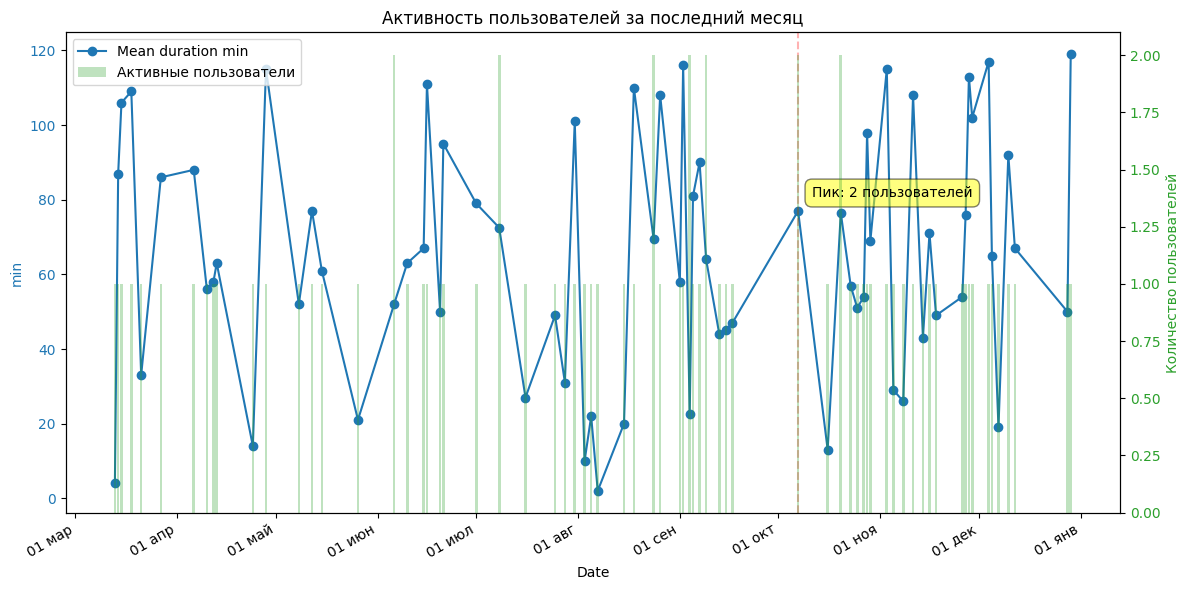

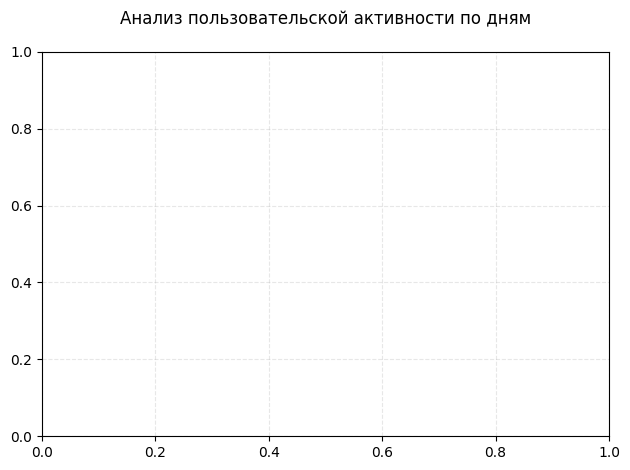

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(daily_status['date'], daily_status['avg_duration'],
         color='tab:blue', label='Mean duration min', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('min', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax1 .axvline(day['date'], color='red', linestyle='--', alpha=0.3)
ax1.annotate(f"Пик: {day['unique_users']} пользователей",
             xy=(day['date'], day['avg_duration']),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))



plt.title('Анализ пользовательской активности по дням', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

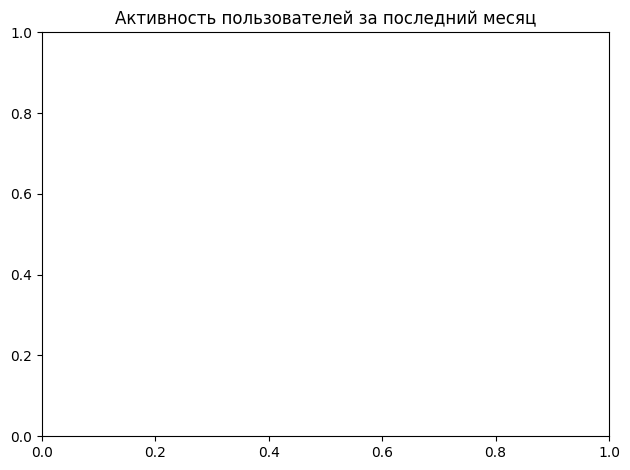

In [ ]:
ax2 = ax1.twinx()
ax2.bar(daily_status['date'], daily_status['unique_users'],
        color='tab:green', alpha=0.3, label='Активные пользователи')
ax2.set_ylabel('Количество пользователей', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
fig.autofmt_xdate()  # Наклон подписей дат

# Легенда и заголовок
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Активность пользователей за последний месяц')
plt.tight_layout()
plt.show()